In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
path = "gdrive/My Drive/Colab Notebooks/Computer Vision with OpenCV and Deep Learning/Image Processing/DATA/"

In [11]:
dark_horse = cv2.imread(path + "horse.jpg")
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread(path + "rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread(path + "bricks.jpg")
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

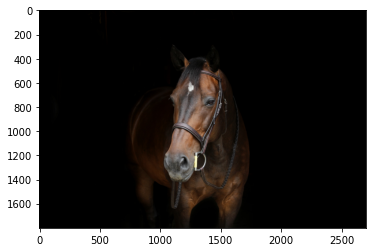

In [5]:
plt.imshow(show_horse)

In [12]:
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256]) #BGR

In [13]:
hist_values.shape

(256, 1)

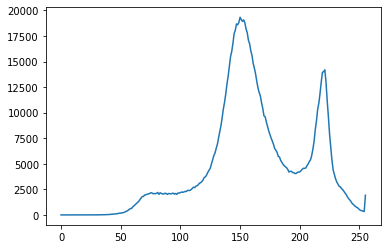

In [14]:
plt.plot(hist_values)

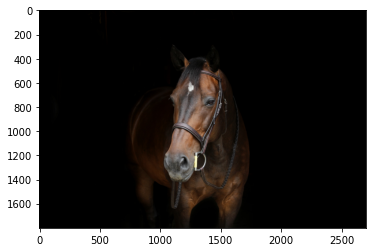

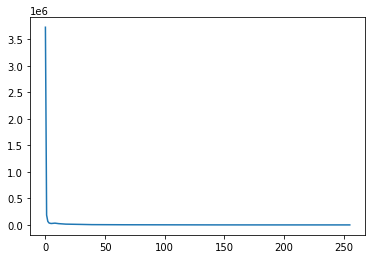

In [15]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256]) #BGR
plt.plot(hist_values)

Text(0.5, 1.0, 'Histogram for Blue Bricks')

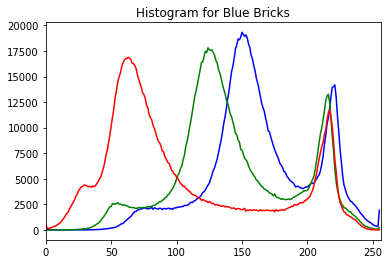

In [18]:
img = blue_bricks
color = ("b", "g", "r")

for i, col in enumerate(color):
  histr = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(histr, color=col)
  plt.xlim([0,256])

plt.title("Histogram for Blue Bricks")

Text(0.5, 1.0, 'Histogram for Horse')

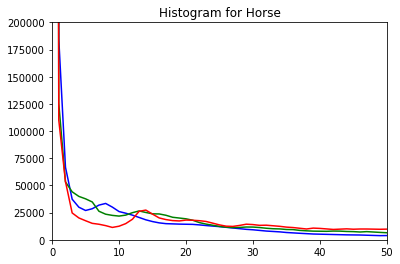

In [21]:
img = dark_horse
color = ("b", "g", "r")

for i, col in enumerate(color):
  histr = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(histr, color=col)
  plt.xlim([0,50])
  plt.ylim([0,200000])

plt.title("Histogram for Horse")